<a href="https://colab.research.google.com/github/MQsparrow/openCV/blob/main/cv0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#前置確認志業
#!pip install opencv-python
#!pip install opencv-contrib-python

#import需要函式庫
import cv2 #openCV 函式庫
import numpy as np #矩陣處理+數學運算 函式庫
import IPython.display as dp #colab內部控制換面需要
from google.colab.patches import cv2_imshow #colab針對openCV額外附加功能(因為環境不同需要)

[[ 71  71  71 ...  71  71  71]
 [ 71  71  71 ...  71  71  71]
 [ 71  71  71 ...  71  71  71]
 ...
 [ 12  11  11 ... 105 104 104]
 [ 14  12   9 ... 106 105 105]
 [ 16  13   9 ... 106 105 105]]
(338, 745)


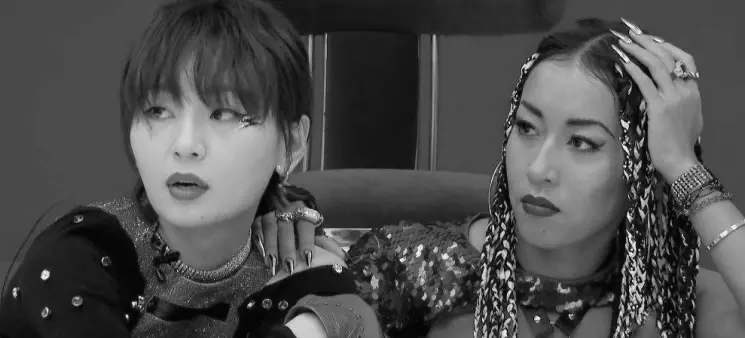

[[[ 47  42 138]
  [ 47  42 138]
  [ 47  42 138]
  ...
  [ 49  41 138]
  [ 49  41 138]
  [ 49  41 138]]

 [[ 47  42 138]
  [ 47  42 138]
  [ 47  42 138]
  ...
  [ 49  41 138]
  [ 49  41 138]
  [ 49  41 138]]

 [[ 47  42 138]
  [ 47  42 138]
  [ 47  42 138]
  ...
  [ 49  41 138]
  [ 49  41 138]
  [ 49  41 138]]

 ...

 [[ 16  12  10]
  [ 15  11   9]
  [ 15  11   9]
  ...
  [ 66  92 145]
  [ 65  91 144]
  [ 65  92 142]]

 [[ 18  14  12]
  [ 16  12  10]
  [ 13   9   8]
  ...
  [ 68  93 146]
  [ 66  92 145]
  [ 66  92 145]]

 [[ 20  16  15]
  [ 17  13  11]
  [ 13   9   8]
  ...
  [ 68  93 146]
  [ 66  92 145]
  [ 66  92 145]]]
(338, 745, 3)


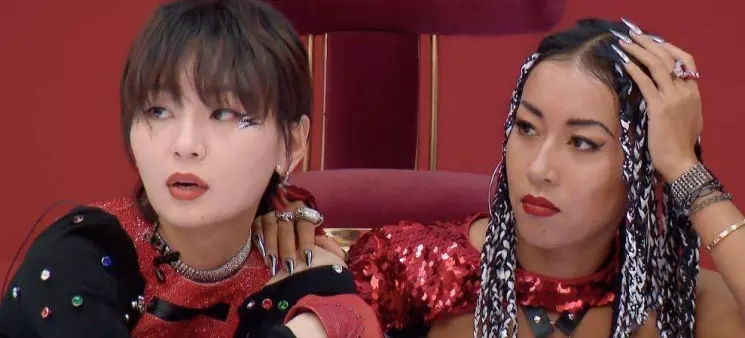

[[[ 47  42 138]
  [ 47  42 138]
  [ 47  42 138]
  ...
  [ 49  41 138]
  [ 49  41 138]
  [ 49  41 138]]

 [[ 47  42 138]
  [ 47  42 138]
  [ 47  42 138]
  ...
  [ 49  41 138]
  [ 49  41 138]
  [ 49  41 138]]

 [[ 47  42 138]
  [ 47  42 138]
  [ 47  42 138]
  ...
  [ 49  41 138]
  [ 49  41 138]
  [ 49  41 138]]

 ...

 [[ 16  12  10]
  [ 15  11   9]
  [ 15  11   9]
  ...
  [ 66  92 145]
  [ 65  91 144]
  [ 65  92 142]]

 [[ 18  14  12]
  [ 16  12  10]
  [ 13   9   8]
  ...
  [ 68  93 146]
  [ 66  92 145]
  [ 66  92 145]]

 [[ 20  16  15]
  [ 17  13  11]
  [ 13   9   8]
  ...
  [ 68  93 146]
  [ 66  92 145]
  [ 66  92 145]]]
(338, 745, 3)


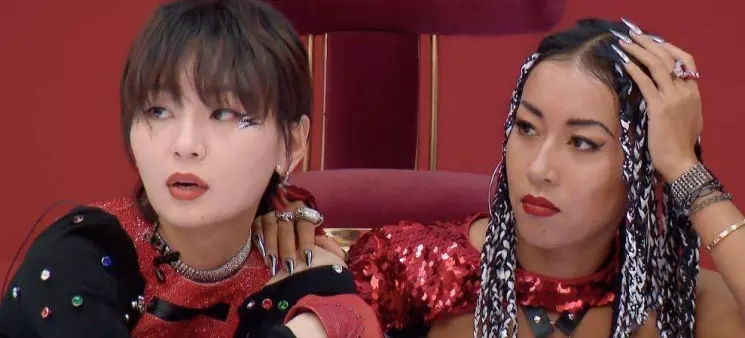

In [58]:
#讀取與顯示圖片
#讀取: 存取變數 = cv2.imread("圖片路徑", 讀取方式)
#顯示: cv2_imshow(要輸出圖片存取變數)

#0 -> 灰階
m1 = cv2.imread("1.jpg", 0) #讀入圖片 存入變數
print(m1) #輸出圖片各色塊矩陣數值
print(m1.shape) #.shape -> (高, 寬, 彩色數值) <-> (0, 1, 2)
cv2_imshow(m1) #印出圖片
#1 -> 彩色(無視透明度)
m2 = cv2.imread("1.jpg", 1)
print(m2)
print(m2.shape)
cv2_imshow(m2)
#-1 -> 完全讀出(包括透明度)
m3 = cv2.imread("1.jpg", -1)
print(m3)
print(m3.shape)
cv2_imshow(m3)

(338, 745, 3)


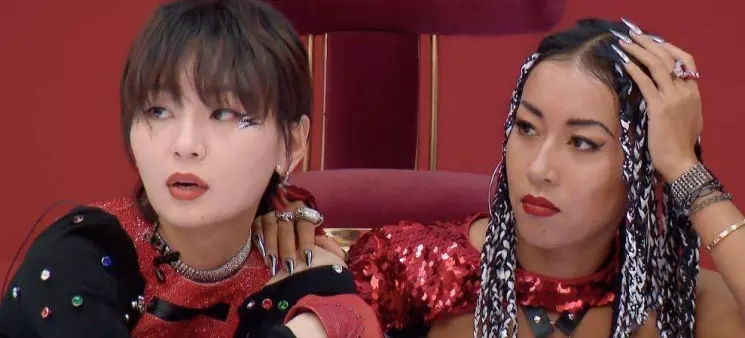

(338, 745, 3)


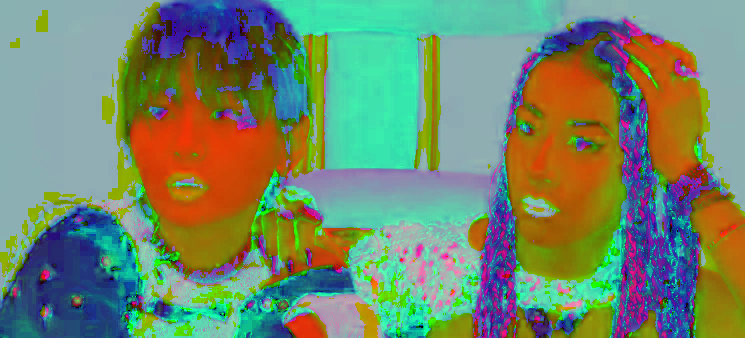

(338, 745)


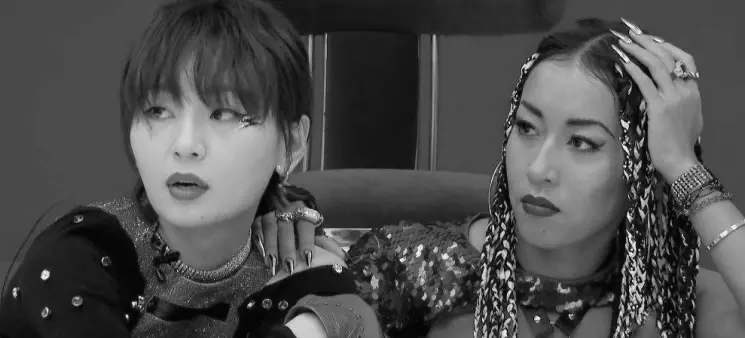

(338, 745, 3)


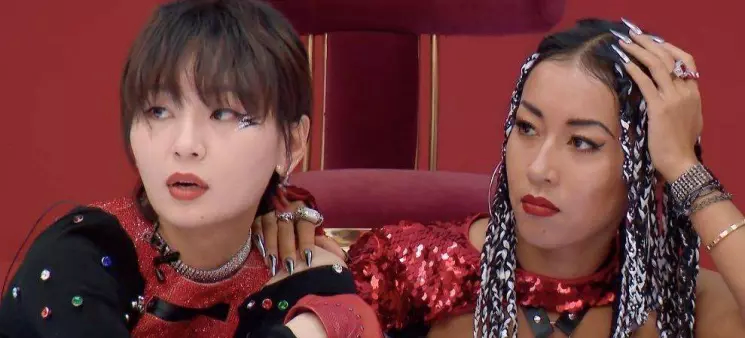

(338, 745, 3)


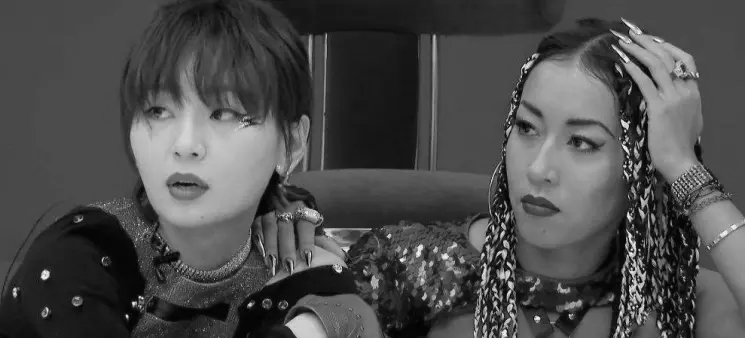

In [59]:
#轉換彩色空間類型
#轉換後圖像變數 = cv2.cvtColor(圖片變數, 轉換類型)
"""
常見轉換類型
cv2.COLOR_BGR2HSV
cv2.COLOR_BGR2GRAY
cv2.COLOR_HSV2BGR
cv2.COLOR_GRAY2BGR
"""
#origin
m2 = cv2.imread("1.jpg", 1)
print(m2.shape)
cv2_imshow(m2)
#cv2.COLOR_BGR2HSV(對數值解讀不同所以畫面顯示不同)
m2_0 = cv2.cvtColor(m2, cv2.COLOR_BGR2HSV)
print(m2_0.shape)
cv2_imshow(m2_0)
#cv2.COLOR_BGR2GRAY
m2_1 = cv2.cvtColor(m2, cv2.COLOR_BGR2GRAY)
print(m2_1.shape)
cv2_imshow(m2_1)
#cv2.COLOR_HSV2BGR
m2_2 = cv2.cvtColor(m2_0, cv2.COLOR_HSV2BGR)
print(m2_2.shape)
cv2_imshow(m2_2)
#cv2.COLOR_GRAY2BGR(僅維度改變 顏色不變)
m2_3 = cv2.cvtColor(m2_1, cv2.COLOR_GRAY2BGR)
print(m2_3.shape)
cv2_imshow(m2_3)

In [60]:
#儲存圖片
#cv2.imwrite("圖片路徑", 變數, 設定參數)
"""
常見參數
png -> 支援透明色(第3為第4個值作為透明值 - 無透明則不顯示)
jpg -> 不支援透明色, 但可調整壓縮比例
    -> 設定參數: [cv2.IMWRITE_JPEG_QUALITY, 畫質比率(0~100)]
    -> ***壓縮的不是大小是像素數(或稱數值) -> 透過摺疊矩陣***
"""
m1 = cv2.imread("1.jpg", -1)
cv2.imwrite("1_0.png", m1)
cv2.imwrite("1_0.jpg", m1, [cv2.IMWRITE_JPEG_QUALITY, 0])
cv2.imwrite("1_25.jpg", m1, [cv2.IMWRITE_JPEG_QUALITY, 25])
cv2.imwrite("1_50.jpg", m1, [cv2.IMWRITE_JPEG_QUALITY, 50])
cv2.imwrite("1_75.jpg", m1, [cv2.IMWRITE_JPEG_QUALITY, 75])
cv2.imwrite("1_100.jpg", m1, [cv2.IMWRITE_JPEG_QUALITY, 100])

True

(338, 745, 3)
(338, 745, 3)


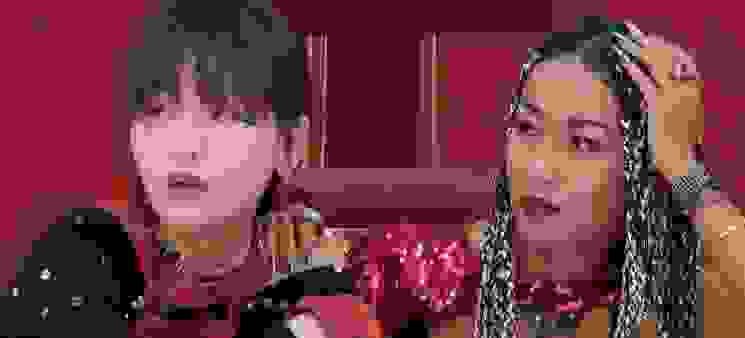

(338, 745, 3)


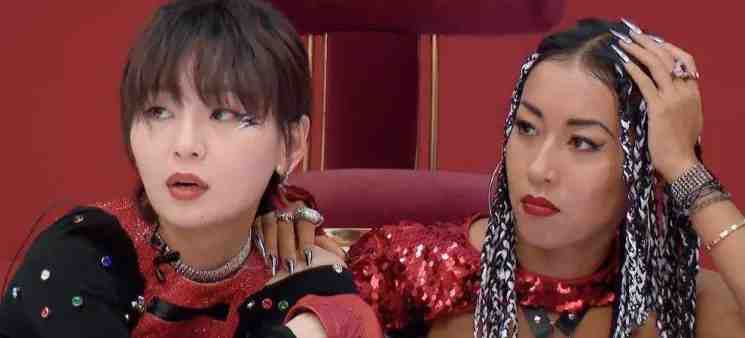

(338, 745, 3)


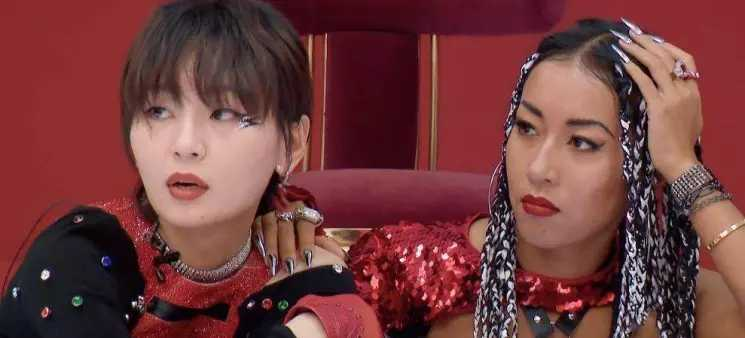

(338, 745, 3)


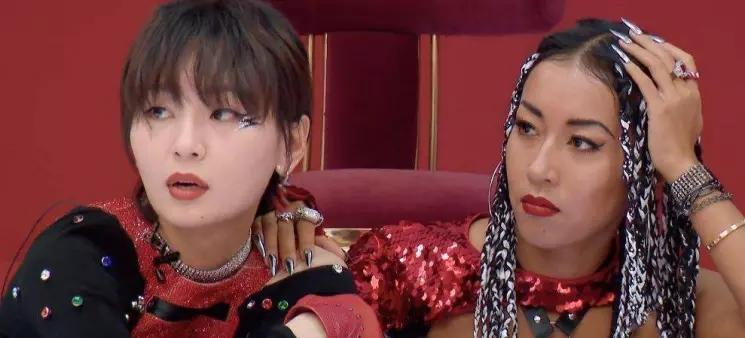

(338, 745, 3)


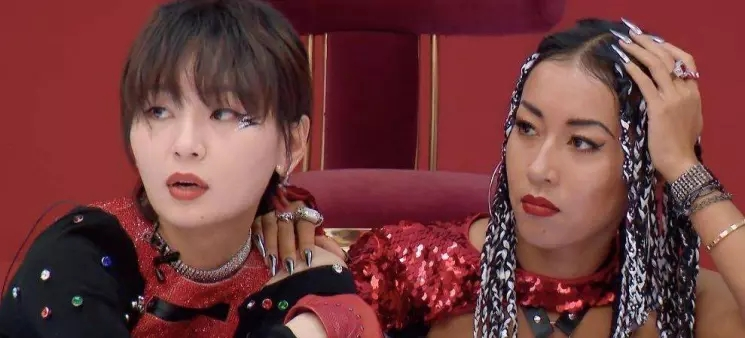

In [61]:
#檢查圖片畫質與檔案大小
#png 370kb
m = cv2.imread("1_0.png", -1)
print(m.shape)
cv2_imshow
#jpg 100%壓縮 6kb
m = cv2.imread("1_0.jpg", -1)
print(m.shape)
cv2_imshow(m)
#jpg 75%壓縮 17kb
m = cv2.imread("1_25.jpg", -1)
print(m.shape)
cv2_imshow(m)
#jpg 50%壓縮 25kb
m = cv2.imread("1_50.jpg", -1)
print(m.shape)
cv2_imshow(m)
#jpg 25%壓縮 37kb
m = cv2.imread("1_75.jpg", -1)
print(m.shape)
cv2_imshow(m)
#jpg 0%壓縮 155kb
m = cv2.imread("1_100.jpg", -1)
print(m.shape)
cv2_imshow(m)

In [62]:
#建立圖片
#openCV靠numpy陣列紀錄圖像數值
#建立一個numpy陣列 = 建立一個圖像
"""
變數 = numpy.full(
    (高, 寬, 3), 
    初始顏色值(藍0~255, 綠0~255, 紅0~255), 
    陣列型態 -> np.uint8 因為色彩空間通常都是8bit
)
"""
#藍
vbl =  np.full((30, 150, 3), (255, 0, 0), np.uint8)
cv2_imshow(vbl)
#綠
vg =  np.full((30, 150, 3), (0, 255, 0), np.uint8)
cv2_imshow(vg)
#紅
vr =  np.full((30, 150, 3), (0, 0, 255), np.uint8)
cv2_imshow(vr)
#黑
vbk =  np.full((30, 150, 3), (0, 0, 0), np.uint8)
cv2_imshow(vbk)
#白
vw =  np.full((30, 150, 3), (255, 255, 255), np.uint8)
cv2_imshow(vw)